In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
dfRaw = pandas.read_excel('/content/drive/My Drive/Colab Notebooks/GKB_usedTBs.xlsx', header=None)
dfRaw = dfRaw.drop(df.columns[0], axis=1)

In [0]:
data = []
for i, row in dfRaw.iterrows():
  if i % 3 == 0:
    data.append(row)

df = pandas.DataFrame(data)

In [0]:
from collections import defaultdict
allNames = []
mapping = defaultdict(dict)

for i, row in df.iterrows():
  for j, cell in row.iteritems():
    if str(cell) != 'nan':
      if j == 1:
        reference = cell
        allNames.append(reference)
      else:
        if '\n' in str(cell):
          value = cell.split('\n')[0]
          cell = cell.split('\n')[1]
          mapping[reference][cell] = value
          allNames.append(cell)
 

In [0]:
allNames = sorted(list(set(allNames)))

In [153]:
matrix = np.full((len(allNames), len(allNames)), 0.1)

for n1, name1Data in mapping.items():
  for n2, value in name1Data.items():
    i1 = allNames.index(n1)
    i2 = allNames.index(n2)

    value = 1 - float(value) / 100
    
    if i1 == i2:
      matrix[i1, i2] = 0
    else:
      matrix[i1, i2] = value

matrix = pandas.DataFrame(matrix)
matrix.shape

(724, 724)

In [154]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=2000, metric='precomputed', random_state=23)
tsne_results = tsne.fit_transform(matrix)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 724 samples in 0.001s...
[t-SNE] Computed neighbors for 724 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 724 / 724
[t-SNE] Mean sigma: 0.031134
[t-SNE] KL divergence after 250 iterations with early exaggeration: 123.227600
[t-SNE] KL divergence after 1000 iterations: 2.296573


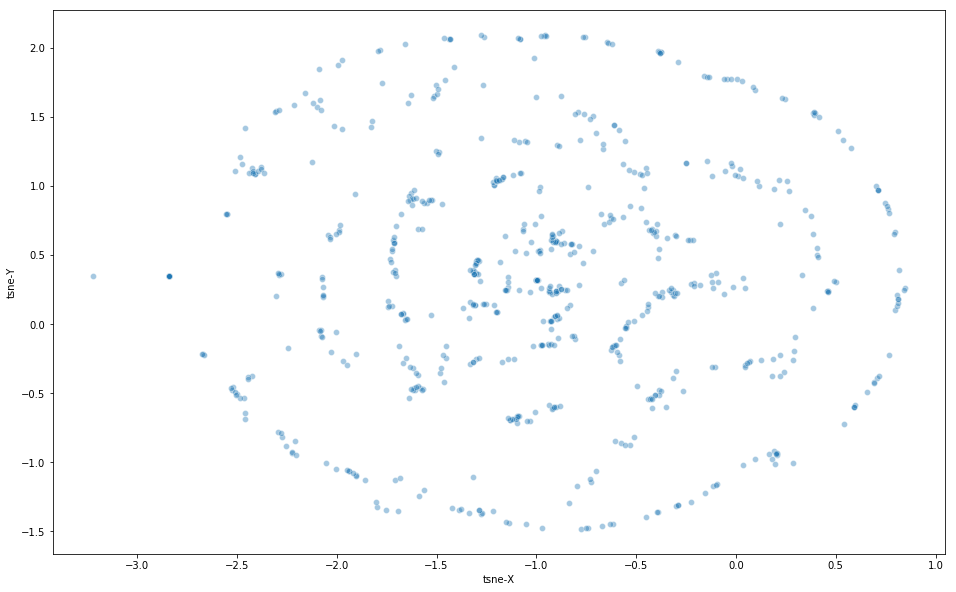

In [158]:
matrixDF = pandas.DataFrame(matrix)
matrixDF['tsne-X'] = tsne_results[:,0]
matrixDF['tsne-Y'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-X", y="tsne-Y",
    palette=sns.color_palette("hls", 10),
    data=matrixDF,
    legend="full",
    alpha=0.4
)